In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
import math as m
import pandas as pd
import scipy.stats as stat
import scipy.optimize as opt
import seaborn as sb
from scipy.integrate import quad
from scipy.integrate import dblquad
from scipy.special import comb
from sklearn.linear_model import LinearRegression
import datetime
import time
#import qgrid
plt.style.use('ggplot')

my_norm = lambda exp, disp: stat.norm(loc = exp, scale = m.sqrt(disp))

### Инициализация

In [3]:
df = pd.read_csv('Cup_IT_2022_Датасет_Data_Science.csv')
df.fillna(value = 0, inplace = True)
df

,client_id,is_in_club,cnt_checks_10_Мясная гастрономия,rto_std_11,rto_6,rto_12_Сыры,rto_12_Птица и изделия из птицы,rto_8,cnt_checks_9,rto_9_Мясная гастрономия,...,rto_stddev_12_Сыры,rto_6_Крупы и зерновые,rto_stddev_7_Рыба и рыбные изделия,rto_stddev_8_Овощи - Фрукты,rto_8_Рыба и рыбные изделия,rto_11_Сыры,cnt_checks_8_Сыры,cnt_checks_8,rto_stddev_9_Мясная гастрономия,rto_stddev_12_Крупы и зерновые
0,0,0,0.0,300.021342,2418.116714,853.016746,0.000000,5092.170392,3.0,0.000000,...,73.846425,148.316558,0.000000,0.000000,0.000000,0.000000,0.0,5.0,0.000000,0.0
1,1,0,1.0,519.031384,19899.211736,0.000000,0.000000,32392.636661,7.0,0.000000,...,0.000000,0.000000,225.219998,301.404157,525.868862,1153.293331,7.0,21.0,0.000000,0.0
2,2,0,0.0,131.165948,411.347689,0.000000,0.000000,1416.656061,0.0,0.000000,...,0.000000,0.000000,0.000000,6.651813,0.000000,0.000000,0.0,5.0,0.000000,0.0
3,3,0,2.0,0.000000,35043.643030,0.000000,0.000000,8460.544337,7.0,1425.707450,...,0.000000,0.000000,0.000000,0.000000,743.245025,0.000000,0.0,4.0,104.784828,0.0
4,4,0,1.0,856.579037,8992.835847,0.000000,0.000000,4914.387768,14.0,663.142041,...,0.000000,0.000000,0.000000,30.906907,0.000000,533.725164,2.0,6.0,143.967128,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135056,135056,0,0.0,196.068192,0.000000,0.000000,0.000000,0.000000,3.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,97.138634,0.0,0.0,0.000000,0.0
135057,135057,0,1.0,402.034438,0.000000,638.046313,241.225584,0.000000,3.0,109.331686,...,65.491622,0.000000,0.000000,0.000000,0.000000,197.113099,0.0,0.0,0.000000,0.0
135058,135058,0,0.0,512.741089,0.000000,283.611949,0.000000,0.000000,2.0,0.000000,...,2.670624,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
135059,135059,0,0.0,124.425093,0.000000,0.000000,0.000000,0.000000,2.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0


### Описательная статистика

In [4]:
for column in df:
    print(df[column].describe(), '\n\n')

count    135061.000000
mean      67530.000000
std       38988.896691
min           0.000000
25%       33765.000000
50%       67530.000000
75%      101295.000000
max      135060.000000
Name: client_id, dtype: float64 


count    135061.000000
mean          0.091944
std           0.288947
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: is_in_club, dtype: float64 


count    135061.000000
mean          1.203552
std           1.891500
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          40.000000
Name: cnt_checks_10_Мясная гастрономия, dtype: float64 


count    135061.000000
mean        495.295509
std         564.840617
min          -1.995844
25%         123.376815
50%         357.421378
75%         679.226401
max       21674.859830
Name: rto_std_11, dtype: float64 


count    135061.000000
mean       4811.916395
std        6854.426343
min          -0.014086
25%    

In [5]:
for column in df:
    print(column, '\n', df.groupby('is_in_club')[column].describe(), '\n\n')

client_id 
                count          mean           std   min       25%      50%  \
is_in_club                                                                  
0           122643.0  68511.408503  38821.371144   0.0  35198.50  68970.0   
1            12418.0  57837.385811  39313.318036  10.0  23172.25  52364.0   

                  75%       max  
is_in_club                       
0           102249.50  135060.0  
1            92782.75  135044.0   


is_in_club 
                count  mean  std  min  25%  50%  75%  max
is_in_club                                              
0           122643.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
1            12418.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0 


cnt_checks_10_Мясная гастрономия 
                count      mean       std  min  25%  50%  75%   max
is_in_club                                                        
0           122643.0  1.135344  1.818402  0.0  0.0  0.0  2.0  40.0
1            12418.0  1.877194  2.399325  0.0  0.0  1.0  3.0

### Графики самих распределений

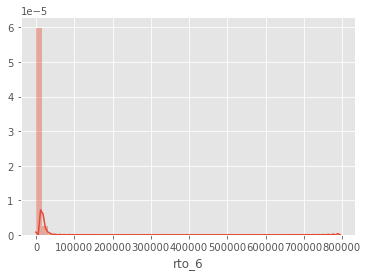

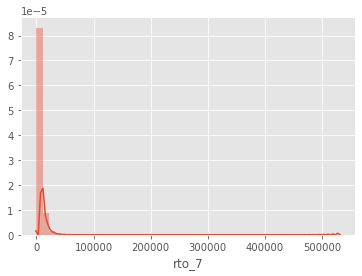

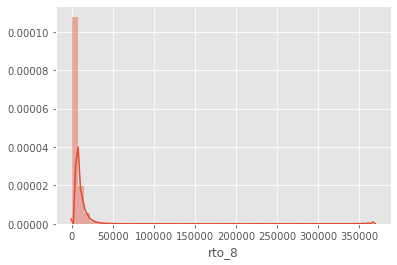

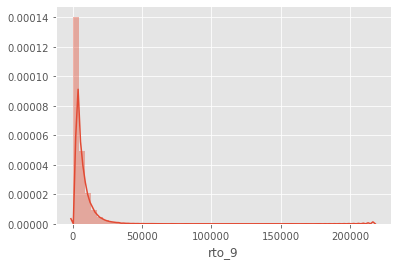

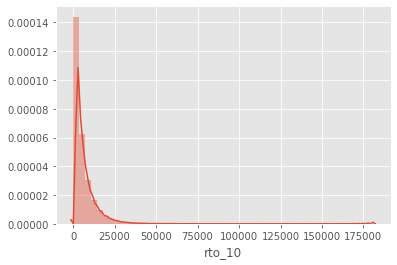

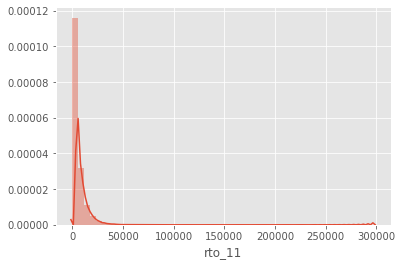

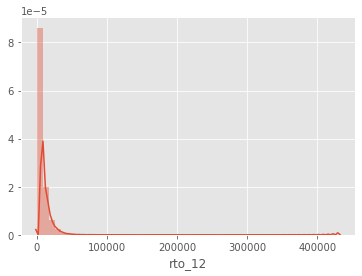

In [8]:
for i in range(6,13):
    sb.distplot(df[df["is_in_club"] == 0]["rto_"+str(i)], kde = True);
    plt.show()

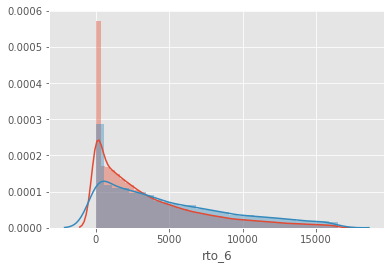

In [25]:
sb.distplot(df[(df["is_in_club"] == 0) & (df["rto_6"] < np.percentile(df["rto_6"], 95))]["rto_6"])
sb.distplot(df[(df["is_in_club"] == 1) & (df["rto_6"] < np.percentile(df["rto_6"], 95))]["rto_6"])

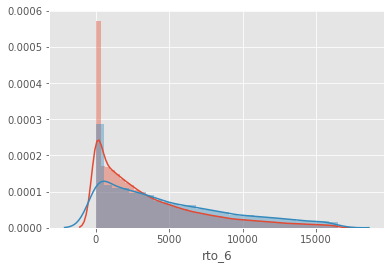

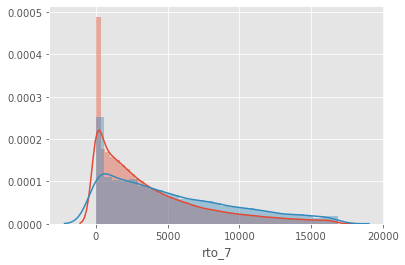

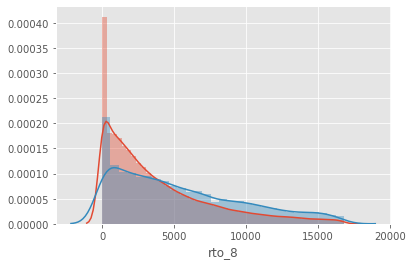

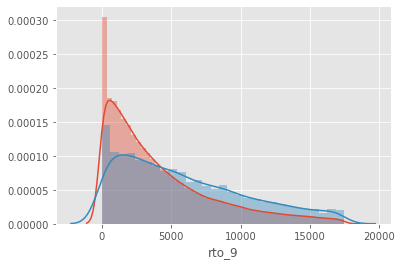

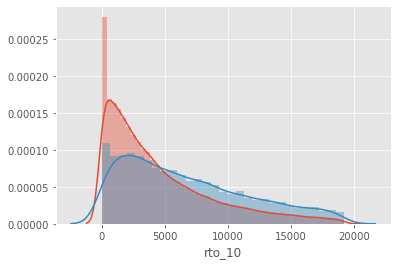

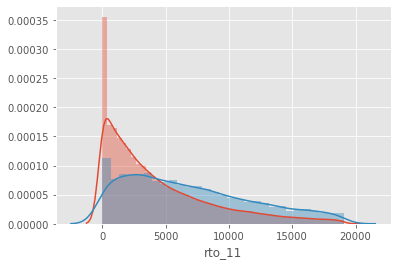

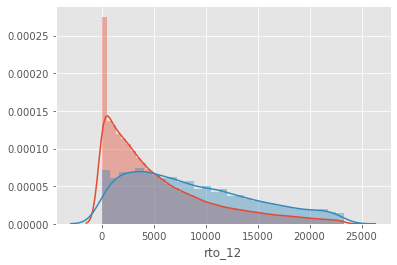

In [26]:
for i in range(6, 13):
    sb.distplot(df[(df["is_in_club"] == 0) & (df["rto_" + str(i)] < np.percentile(df["rto_" + str(i)], 95))]["rto_" + str(i)])
    sb.distplot(df[(df["is_in_club"] == 1) & (df["rto_" + str(i)] < np.percentile(df["rto_" + str(i)], 95))]["rto_" + str(i)])
    plt.show()

### Критерии Колмогорова

In [35]:
for i in range(6, 13):
    name = "rto_"+str(i)
    df1 = df[df["is_in_club"] == 1]
    my_data = df1[df1["rto_6"] < np.percentile(df1["rto_6"], 97.5)]["rto_6"]/1000
    print(name, "is in club")
    print("EXP:", stat.kstest(my_data, 'expon'))
    
    fitted = stat.gamma.fit(my_data)
    print("Gamma", stat.kstest(my_data, lambda x: stat.gamma(a = fitted[0], loc = fitted[1], scale = fitted[2]).cdf(x)))
    print()

rto_6 is in club
EXP: KstestResult(statistic=0.5737639415679335, pvalue=0.0)
Gamma KstestResult(statistic=0.1144013332176077, pvalue=1.7268101742865733e-138)

rto_7 is in club
EXP: KstestResult(statistic=0.5737639415679335, pvalue=0.0)
Gamma KstestResult(statistic=0.1144013332176077, pvalue=1.7268101742865733e-138)

rto_8 is in club
EXP: KstestResult(statistic=0.5737639415679335, pvalue=0.0)
Gamma KstestResult(statistic=0.1144013332176077, pvalue=1.7268101742865733e-138)

rto_9 is in club
EXP: KstestResult(statistic=0.5737639415679335, pvalue=0.0)
Gamma KstestResult(statistic=0.1144013332176077, pvalue=1.7268101742865733e-138)

rto_10 is in club
EXP: KstestResult(statistic=0.5737639415679335, pvalue=0.0)
Gamma KstestResult(statistic=0.1144013332176077, pvalue=1.7268101742865733e-138)

rto_11 is in club
EXP: KstestResult(statistic=0.5737639415679335, pvalue=0.0)
Gamma KstestResult(statistic=0.1144013332176077, pvalue=1.7268101742865733e-138)

rto_12 is in club
EXP: KstestResult(statisti

In [36]:
for i in range(6, 13):
    name = "rto_"+str(i)
    df1 = df[df["is_in_club"] == 0]
    my_data = df1[df1["rto_6"] < np.percentile(df1["rto_6"], 97.5)]["rto_6"]/1000
    print(name, "is not in club")
    print("EXP:", stat.kstest(my_data, 'expon'))
    
    fitted = stat.gamma.fit(my_data)
    print("Gamma", stat.kstest(my_data, lambda x: stat.gamma(a = fitted[0], loc = fitted[1], scale = fitted[2]).cdf(x)))
    print()

rto_6 is not in club
EXP: KstestResult(statistic=0.42607799237907795, pvalue=0.0)
Gamma KstestResult(statistic=0.27557010484362027, pvalue=0.0)

rto_7 is not in club
EXP: KstestResult(statistic=0.42607799237907795, pvalue=0.0)
Gamma KstestResult(statistic=0.27557010484362027, pvalue=0.0)

rto_8 is not in club
EXP: KstestResult(statistic=0.42607799237907795, pvalue=0.0)
Gamma KstestResult(statistic=0.27557010484362027, pvalue=0.0)

rto_9 is not in club
EXP: KstestResult(statistic=0.42607799237907795, pvalue=0.0)
Gamma KstestResult(statistic=0.27557010484362027, pvalue=0.0)

rto_10 is not in club
EXP: KstestResult(statistic=0.42607799237907795, pvalue=0.0)
Gamma KstestResult(statistic=0.27557010484362027, pvalue=0.0)

rto_11 is not in club
EXP: KstestResult(statistic=0.42607799237907795, pvalue=0.0)
Gamma KstestResult(statistic=0.27557010484362027, pvalue=0.0)

rto_12 is not in club
EXP: KstestResult(statistic=0.42607799237907795, pvalue=0.0)
Gamma KstestResult(statistic=0.27557010484362

### Графики 3-квартильных сравнений распределений 

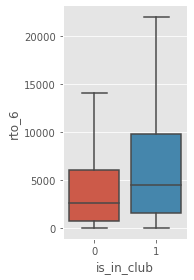

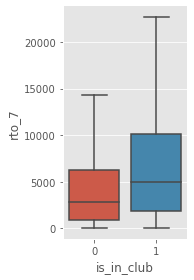

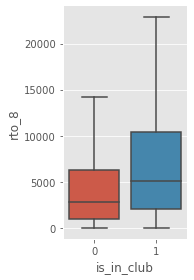

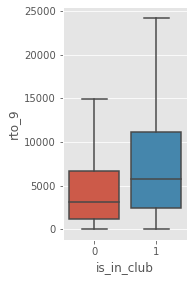

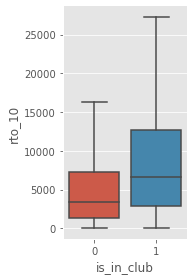

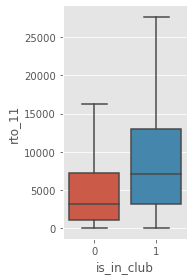

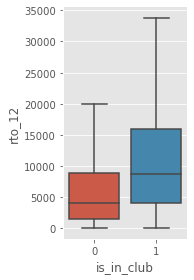

In [7]:
for i in range(6,13):
    sb.catplot(x="is_in_club", y="rto_"+str(i),
                data=df, kind="box",
                height=4, aspect=.7, showfliers = False);
    plt.show()

### Мораль: люди в клубах  больше покупают!

### Посмотрим теперь отдельно по категориям товаров

In [18]:
cat = ["Крупы и зерновые", "Мясная гастрономия", "Овощи - Фрукты", "Птица и изделия из птицы",\
"Рыба и рыбные изделия", "Сыры"]
rto_cat = [["rto_" + str(i) + "_" + elem for elem in cat] for i in range(6,13) ]
rto_cat

[['rto_6_Крупы и зерновые',
  'rto_6_Мясная гастрономия',
  'rto_6_Овощи - Фрукты',
  'rto_6_Птица и изделия из птицы',
  'rto_6_Рыба и рыбные изделия',
  'rto_6_Сыры'],
 ['rto_7_Крупы и зерновые',
  'rto_7_Мясная гастрономия',
  'rto_7_Овощи - Фрукты',
  'rto_7_Птица и изделия из птицы',
  'rto_7_Рыба и рыбные изделия',
  'rto_7_Сыры'],
 ['rto_8_Крупы и зерновые',
  'rto_8_Мясная гастрономия',
  'rto_8_Овощи - Фрукты',
  'rto_8_Птица и изделия из птицы',
  'rto_8_Рыба и рыбные изделия',
  'rto_8_Сыры'],
 ['rto_9_Крупы и зерновые',
  'rto_9_Мясная гастрономия',
  'rto_9_Овощи - Фрукты',
  'rto_9_Птица и изделия из птицы',
  'rto_9_Рыба и рыбные изделия',
  'rto_9_Сыры'],
 ['rto_10_Крупы и зерновые',
  'rto_10_Мясная гастрономия',
  'rto_10_Овощи - Фрукты',
  'rto_10_Птица и изделия из птицы',
  'rto_10_Рыба и рыбные изделия',
  'rto_10_Сыры'],
 ['rto_11_Крупы и зерновые',
  'rto_11_Мясная гастрономия',
  'rto_11_Овощи - Фрукты',
  'rto_11_Птица и изделия из птицы',
  'rto_11_Рыба и рыб

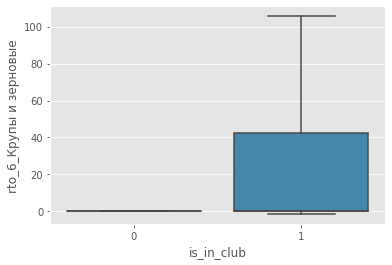

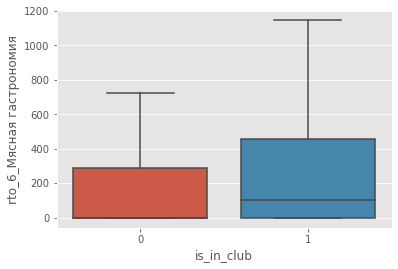

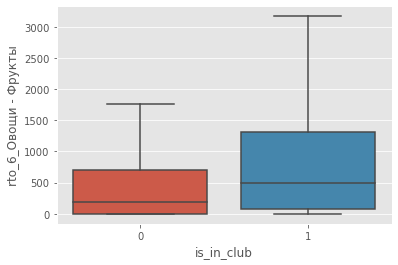

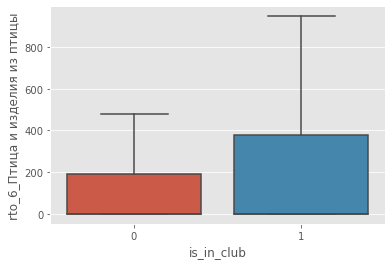

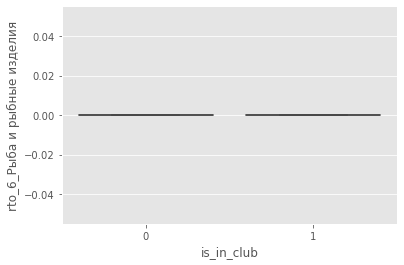

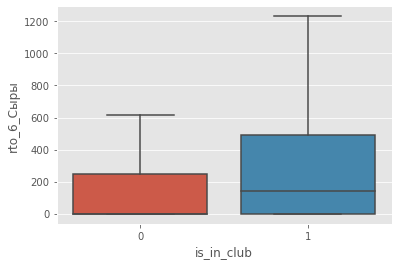

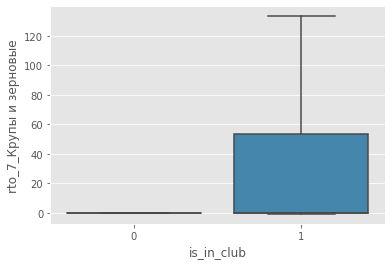

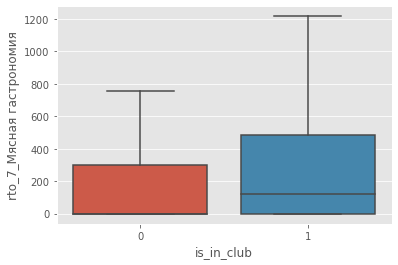

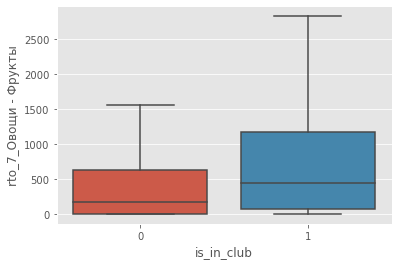

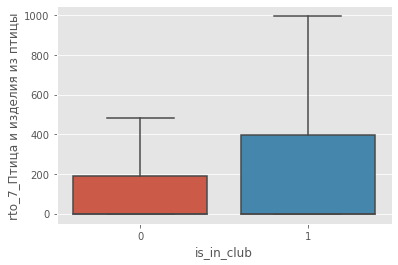

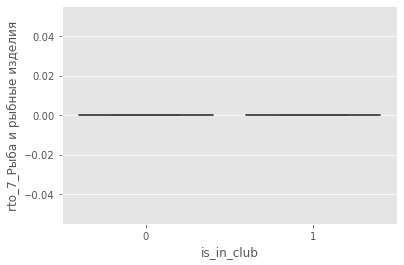

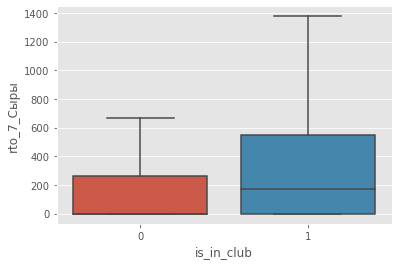

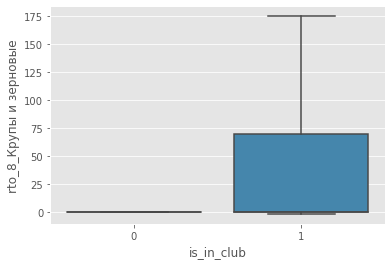

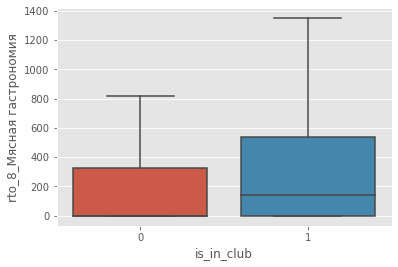

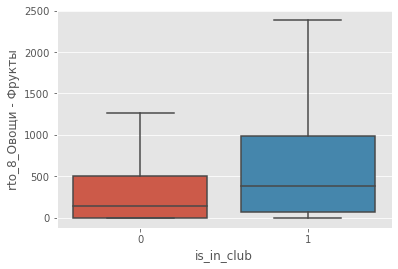

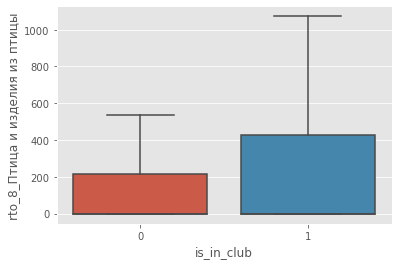

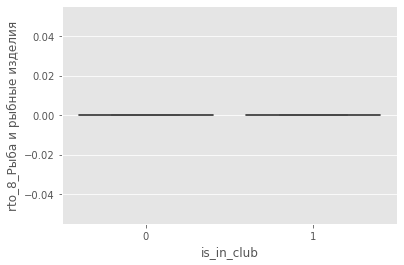

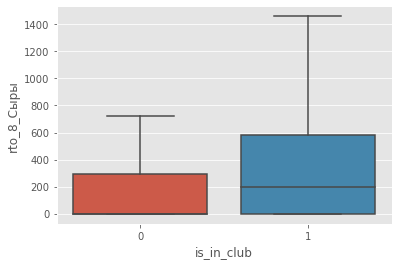

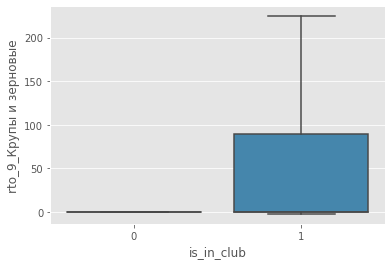

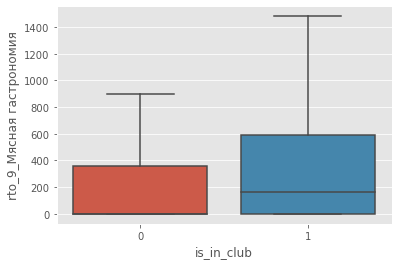

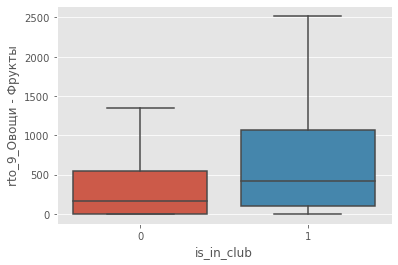

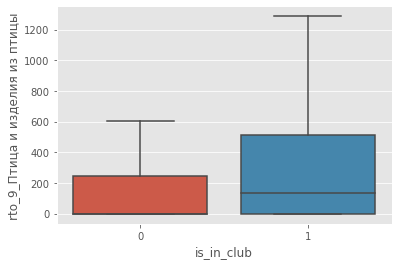

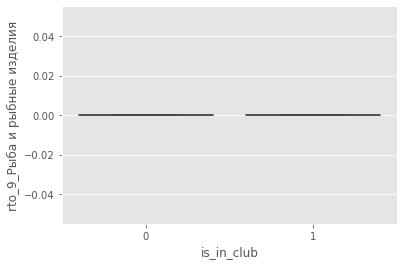

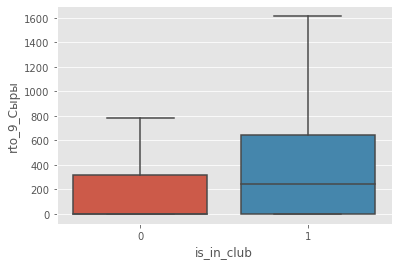

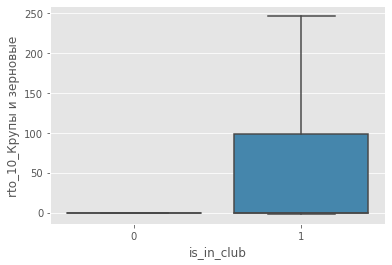

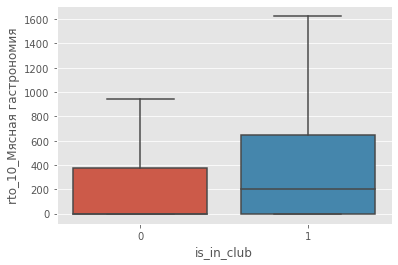

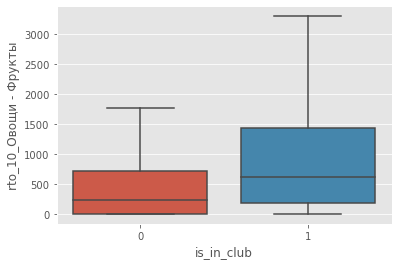

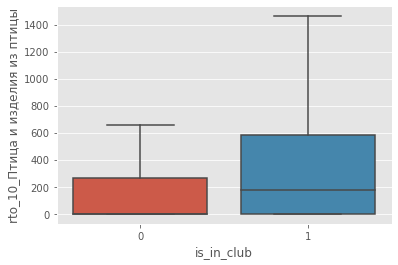

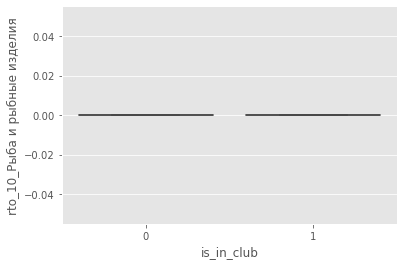

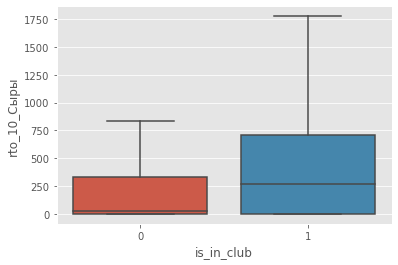

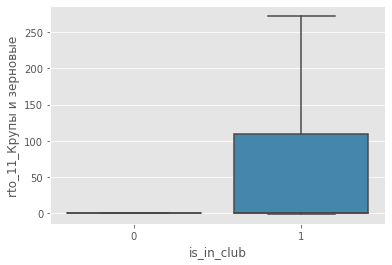

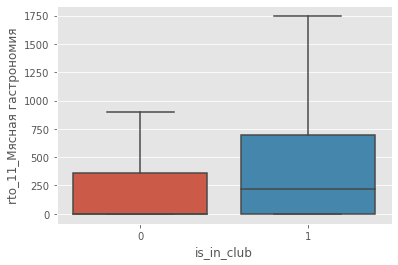

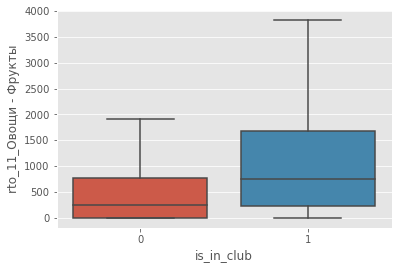

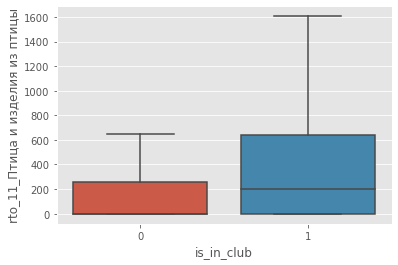

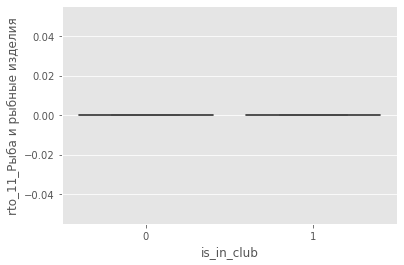

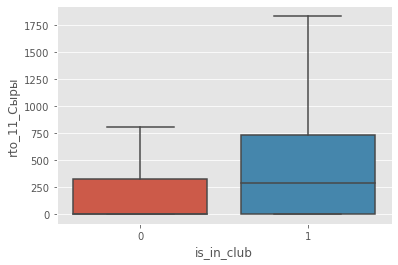

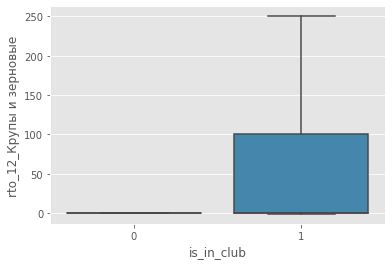

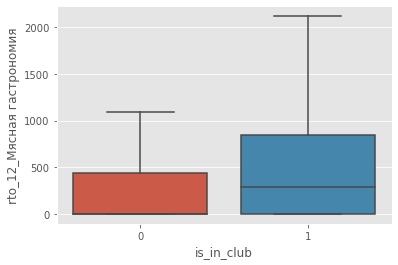

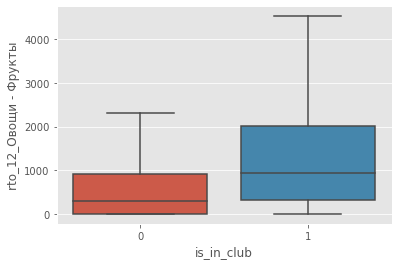

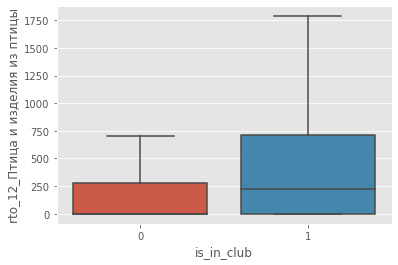

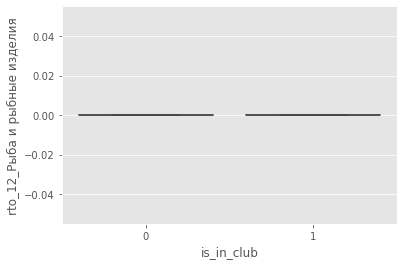

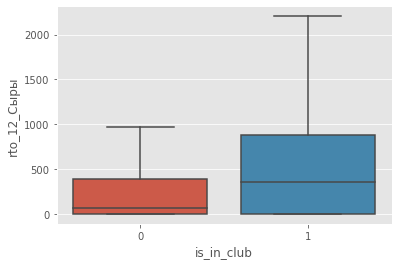

In [19]:
for cat_type in rto_cat:
    for month in cat_type:
        sb.boxplot(x="is_in_club", y=month,
                    data=df,   showfliers = False);
        plt.show()

In [20]:
def splitter(s: str):
    spl = s.split("_")
    return spl[0] + "_" + spl[1]

for cat_type in rto_cat:
    for month in cat_type:
        df[month + "_norm"] = df[month] / df[splitter(month)]

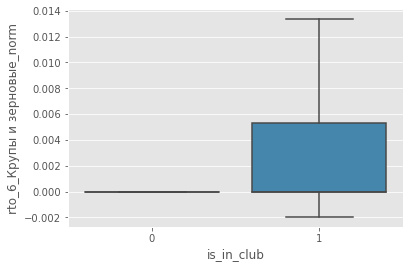

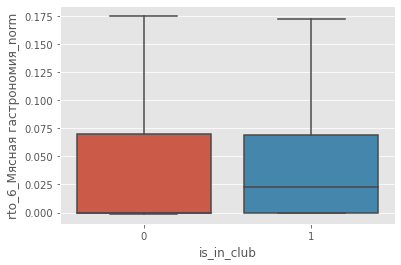

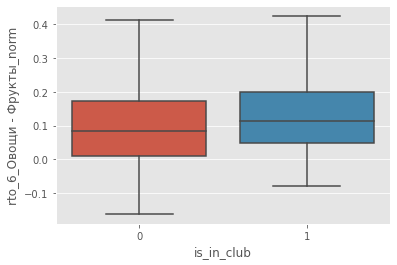

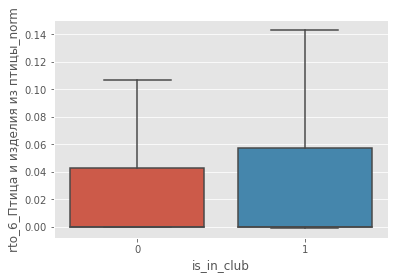

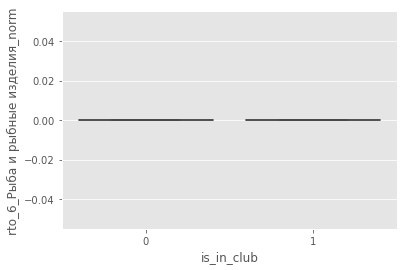

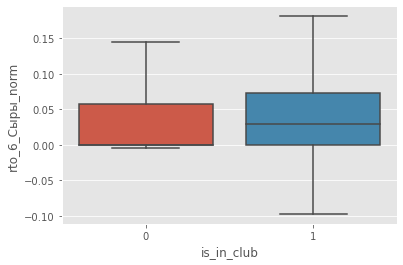

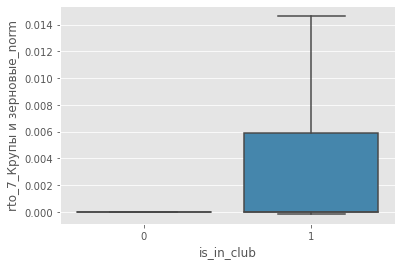

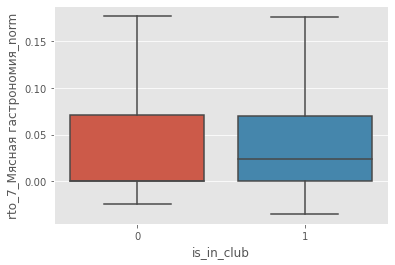

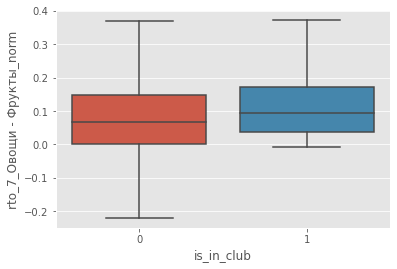

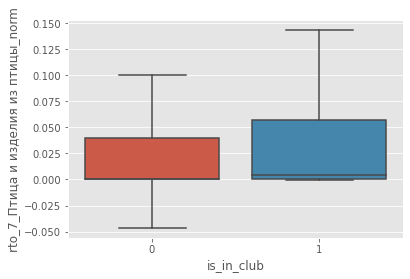

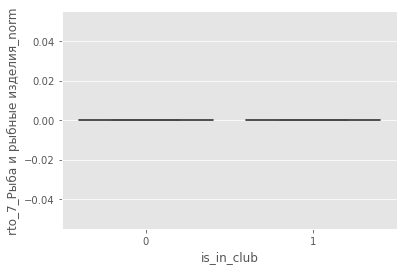

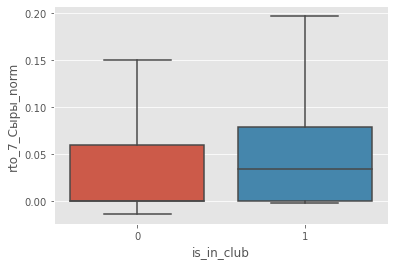

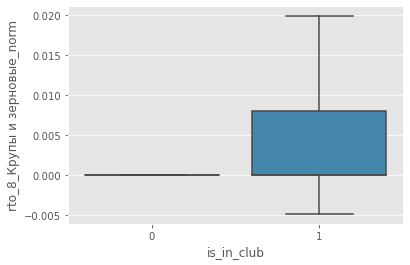

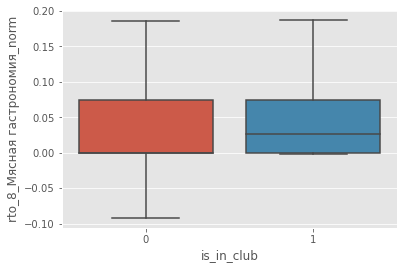

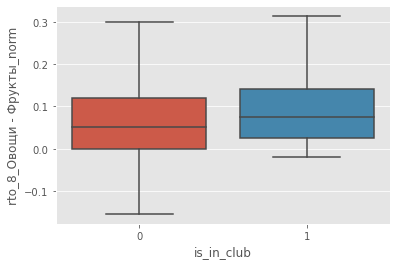

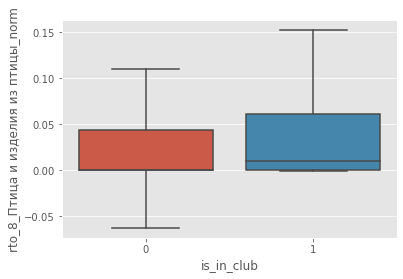

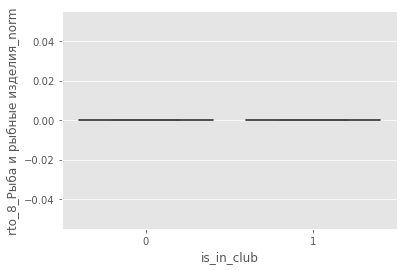

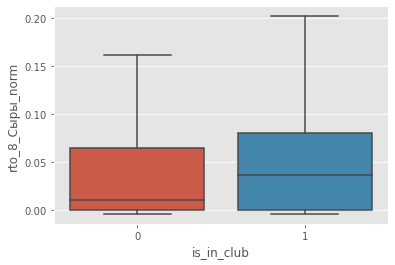

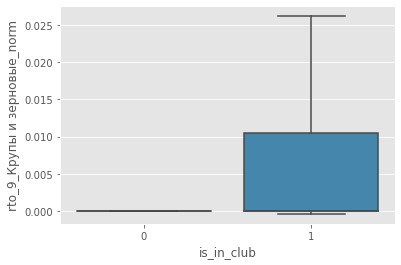

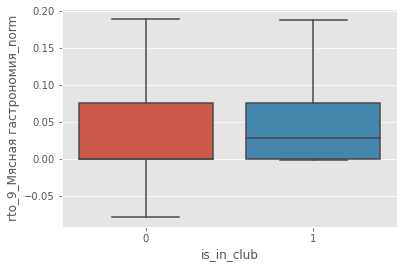

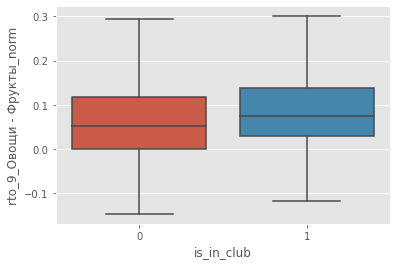

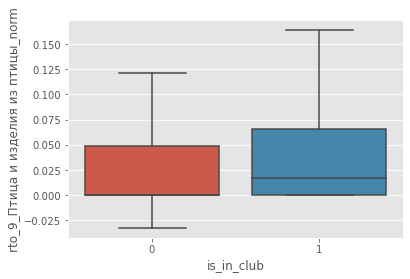

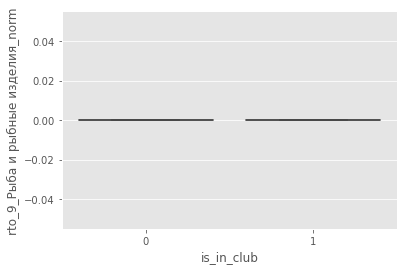

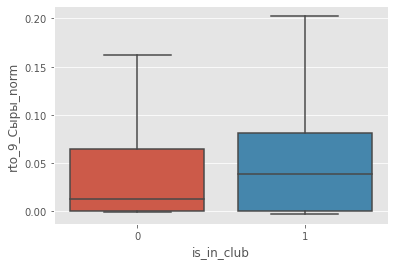

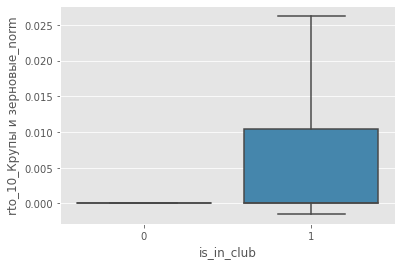

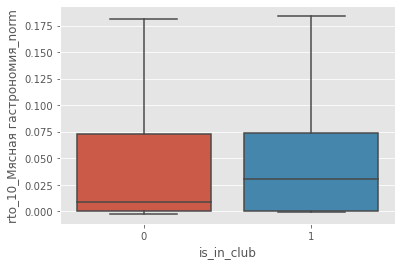

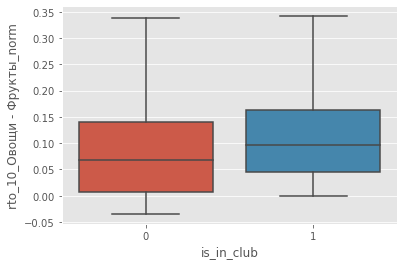

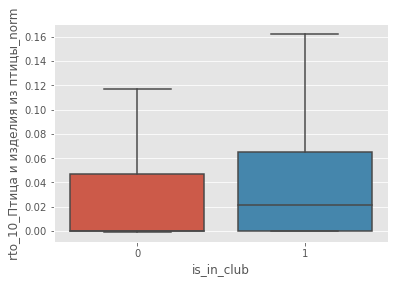

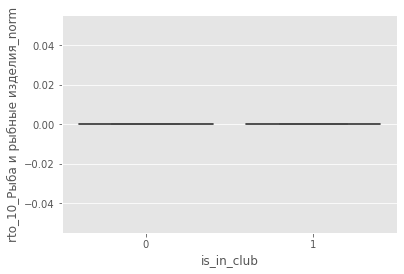

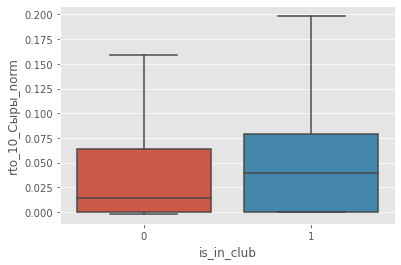

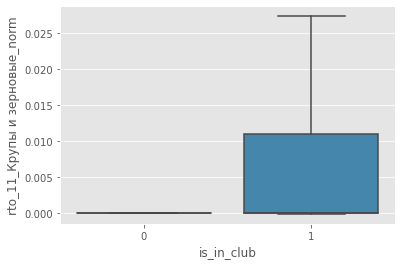

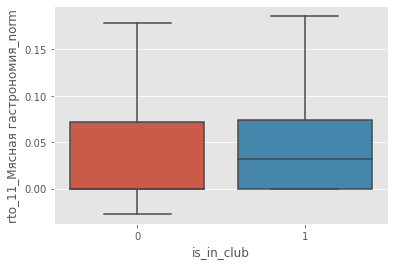

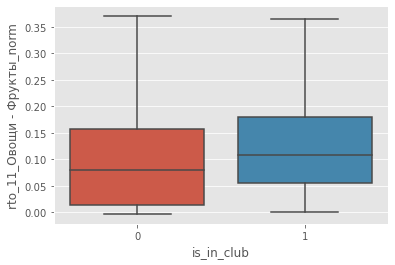

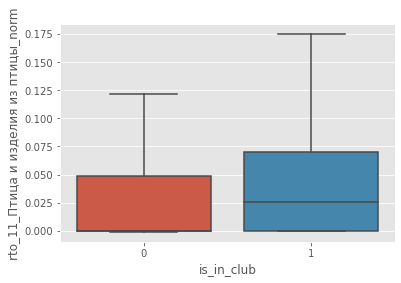

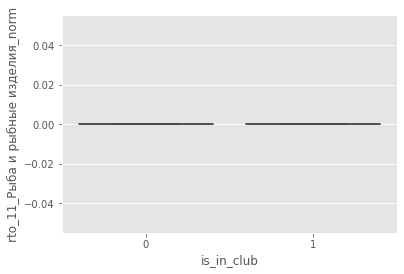

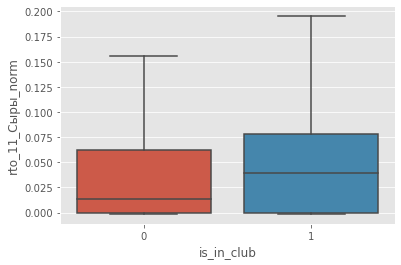

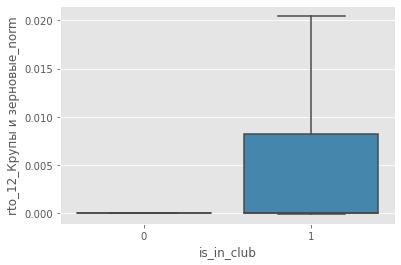

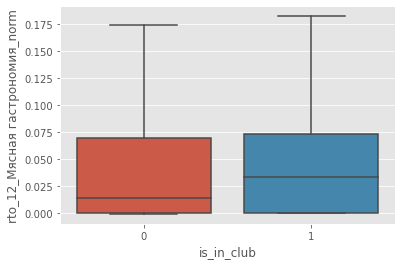

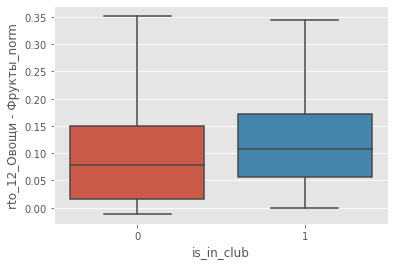

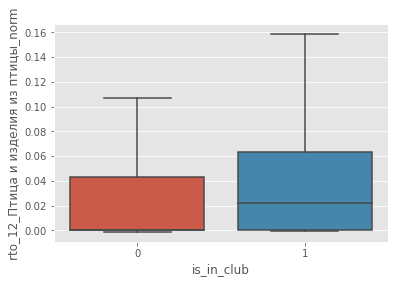

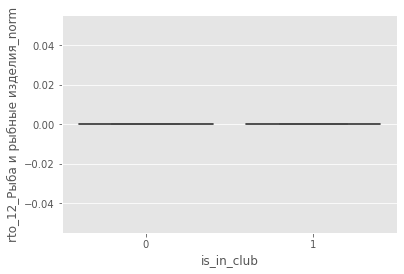

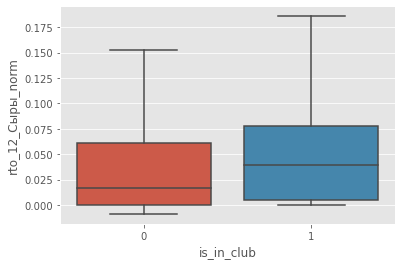

In [21]:
for cat_type in rto_cat:
    for month in cat_type:
        sb.boxplot(x="is_in_club", y=month+"_norm",
                    data=df, showfliers = False);
        plt.show()

### Теперь средний чек

In [22]:
for i in range(6, 13):
    df["avg_check_" + str(i)] = df["rto_"+str(i)] / df["cnt_checks_" + str(i)]

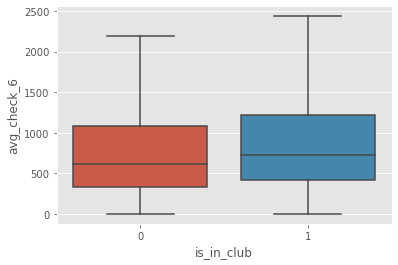

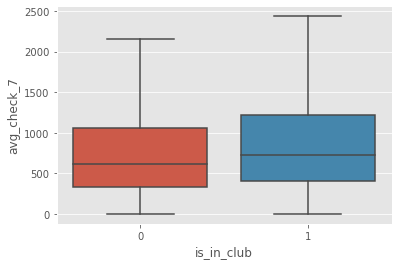

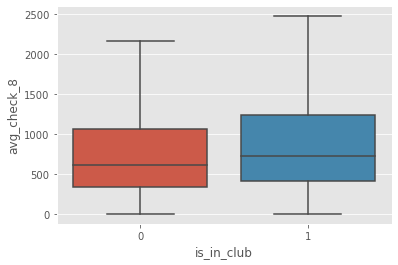

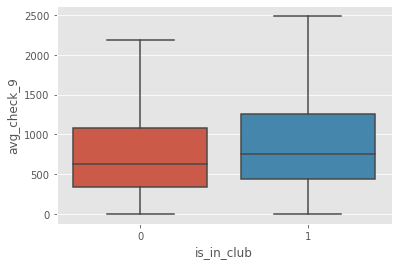

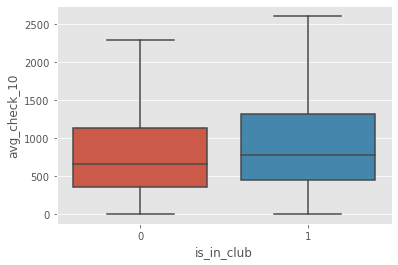

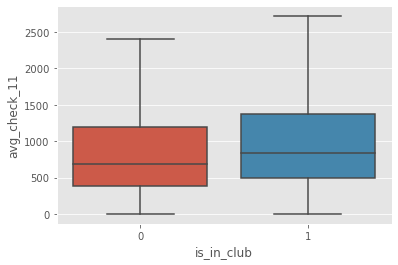

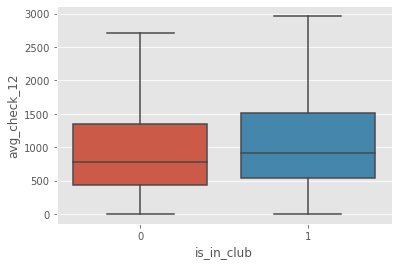

In [23]:
for i in range(6, 13):
    sb.boxplot(x="is_in_club", y="avg_check_" + str(i),
                data=df, showfliers = False);
    plt.show()

### Можно видеть, что, например, сыры члены клуба покупают на большие суммы

### Классификатор

In [39]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(np.asarray([df["rto_6"].fillna(value = 0), df["rto_7"].fillna(value = 0),\
                             df["rto_8"].fillna(value = 0), df["rto_9"].fillna(value = 0), \
                             df["rto_10"].fillna(value = 0), df["rto_11"].fillna(value = 0),\
                             df["rto_12"].fillna(value = 0)]).T, np.asarray(df["is_in_club"]))

BernoulliNB()

In [40]:
clf.score(np.asarray([df["rto_6"].fillna(value = 0), df["rto_7"].fillna(value = 0),\
                             df["rto_8"].fillna(value = 0), df["rto_9"].fillna(value = 0), \
                             df["rto_10"].fillna(value = 0), df["rto_11"].fillna(value = 0),\
                             df["rto_12"].fillna(value = 0)]).T, np.asarray(df["is_in_club"]))

0.9080563597189418

In [41]:
pr = clf.predict(np.asarray([df["rto_6"].fillna(value = 0), df["rto_7"].fillna(value = 0),\
                             df["rto_8"].fillna(value = 0), df["rto_9"].fillna(value = 0), \
                             df["rto_10"].fillna(value = 0), df["rto_11"].fillna(value = 0),\
                             df["rto_12"].fillna(value = 0)]).T)
pr

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
corr0_cnt, corr1_cnt, incorr0_cnt, incorr1_cnt = 0, 0, 0, 0
for real_el, pr_el in zip(df["is_in_club"], pr):
    if real_el == 0:
        if real_el == pr_el:
            corr0_cnt += 1
        else:
            incorr0_cnt += 1
            
    else:
        if real_el == pr_el:
            corr1_cnt += 1
        else:
            incorr1_cnt += 1
            
print(f"for 0 {corr0_cnt} correct of {corr0_cnt + incorr0_cnt}, that makes {corr0_cnt/(corr0_cnt + incorr0_cnt)}")
print(f"for 1 {corr1_cnt} correct of {corr1_cnt + incorr1_cnt}, that makes {corr1_cnt/(corr1_cnt + incorr1_cnt)}")

for 0 122643 correct of 122643, that makes 1.0
for 1 0 correct of 12418, that makes 0.0


In [43]:
len(df["rto_10"].fillna(value = 0))

135061

### Поскольку большинство клиентов в датасете не члены клуба, бернуллиевкий байесовский классификатор работает плохо

### CatBoost

In [45]:
import catboost
from sklearn.model_selection import train_test_split
y = df['is_in_club']
data = df.drop('is_in_club', axis=1)
X_train_origin, X_test_origin, y_train, y_test = train_test_split(data, y,
                                                                  train_size=0.7, 
                                                                  random_state=42)

In [46]:
boosting_model = catboost.CatBoostClassifier(
                                             verbose=100,
                                             depth = 8,
                                             iterations = 600,
                                             learning_rate = 0.03
                                            )

boosting_model.fit(X_train_origin, y_train)

y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]

0:	learn: 0.6623433	total: 419ms	remaining: 4m 11s
100:	learn: 0.2713763	total: 9.42s	remaining: 46.5s
200:	learn: 0.2619013	total: 20.5s	remaining: 40.7s
300:	learn: 0.2550732	total: 29s	remaining: 28.8s
400:	learn: 0.2484819	total: 37.6s	remaining: 18.6s
500:	learn: 0.2410829	total: 46.3s	remaining: 9.14s
599:	learn: 0.2345206	total: 55.1s	remaining: 0us


In [57]:
t = [1 if x > 0.5 else 0 for x in y_train_predicted]
tp = 0 
fp = 0 
tn = 0 
fn = 0 

for ind, label in enumerate(t): 
    if label == np.array(y_train)[ind] == 1: 
        tp+=1 
    elif label == np.array(y_train)[ind] == 0: 
        tn+=1 
    elif label == 1: 
        fp+=1 
    else: 
        fn+=1

In [58]:
print(f'tp = {tp}, fp = {fp}, fn = {fn}, tn = {tn}')

tp = 831, fp = 0, fn = 7828, tn = 85883


### Как видно, CatBoost показывает плохие результаты (fp = 0)

### Обучим нейронную сеть

In [59]:
df = pd.read_csv('Cup_IT_2022_Датасет_Data_Science.csv')
df.fillna(value = 0, inplace = True)
data = df.drop(['is_in_club'], axis = 1).to_numpy()
labs = df['is_in_club'].to_numpy()

In [ ]:
import torch
import os
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(DEVICE)

class Trainer:
    def __init__(self , criterion, optimizer, lr = 0.003, batch_size = 1024):
        self.lr = lr
        self.batch = batch_size
        self.criterion = criterion
        self.optimizer = optimizer
        # Define hparams here or load them from a config file
        
    def fit_epoch(self, model, train_loader):
        running_loss = 0.0
        running_corrects = 0
        processed_data = 0
  
        for inputs, targets in tqdm(train_loader):
            inputs = inputs.to(DEVICE)
            targets = torch.unsqueeze(targets.to(DEVICE),axis = 1)
            optimizer.zero_grad()

            outputs = model(inputs.float())
                                                            #print(outputs.size(), targets.size())
            loss = self.criterion(outputs, targets.float())
            loss.backward()
            self.optimizer.step()
            
            running_loss += loss.item() * inputs.size(0) 
            processed_data += inputs.size(0)
        train_loss = running_loss / processed_data
        return train_loss
        
    def eval_epoch(self, model, val_loader):
        model.eval()
        running_loss = 0.0
        
        processed_size = 0

        for inputs, targets in val_loader:
            inputs = inputs.to(DEVICE)
            targets = torch.unsqueeze(targets.to(DEVICE),axis = 1)

            with torch.set_grad_enabled(False):
                outputs = model(inputs.float())
                loss = self.criterion(outputs, targets.float())

            running_loss += loss.item() * inputs.size(0)
            processed_size += inputs.size(0)
        val_loss = running_loss / processed_size
        return val_loss
        
    def train(self, model, epochs, train_dataset, val_dataset, sampler):
        
        train_dataset = train_dataset
        train_loader = DataLoader(train_dataset, batch_size=self.batch, sampler = sampler )
        val_dataset = val_dataset
        val_loader = DataLoader(val_dataset, batch_size=self.batch, shuffle=False)
        
        model = model
        
        
        
        
        
        
        for epoch in range(epochs):
            train_loss = self.fit_epoch(model, train_loader)
            print("train_loss= ", train_loss)

            val_loss = self.eval_epoch(model, val_loader)
            print("val_loss= ", val_loss, "\n")
    

In [ ]:
from torch.utils.data import Dataset
import torchvision.transforms as T

In [ ]:
len(data)

In [ ]:
class buyers(Dataset):
    def __init__(self, data1, labels):
        # Initialize dataset, you may use a second dataset for validation if required
        # Use the input transform to convert images to grayscale
        self.data = data1
        self.labels = labels
        self.len_ = len(data1)
        
        
    
    def __len__(self) -> int:
        # return Length of dataset
        return len(self.data)
    
    
    
    def __getitem__(self, index) :
        # Return the input tensor and output tensor for training
        a = self.data[index]
        b = self.labels[index]
        target = torch.from_numpy(a)
        labels = b
        return target, labels

In [ ]:
train_set = buyers(data, labs)

In [ ]:
import torch.nn as nn
import torchvision.models as models


class Net(nn.Module):
    def __init__(self, input_size=256):
        super(Net, self).__init__()
    
        self.input = nn.Sequential( 
            nn.Linear(211, 1024),
            nn.Linear(1024, 2048),
            nn.BatchNorm1d(2048),
            nn.ReLU())
        
        self.lin1 = nn.Sequential( 
            nn.Linear(2048, 2048),
            nn.BatchNorm1d(2048),
            nn.ReLU(),
            nn.Linear(2048, 2048),
            nn.BatchNorm1d(2048),
            nn.ReLU(),
            nn.Linear(2048, 2048),
            nn.BatchNorm1d(2048),
            nn.ReLU(),
            )
        self.output = nn.Sequential( 
            nn.Linear(2048, 1),
            nn.Sigmoid()
            )
    def forward(self, input):
        x = self.input(input)
        mid = self.lin1(x)
        output = self.output(mid)
        return output

In [ ]:
criterion = nn.BCELoss()

In [ ]:
model = Net()

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.9)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(data, labs, test_size = 0.3, random_state = 42)

In [ ]:
x_train_set = buyers(x_train, y_train)

In [ ]:
x_val_set = buyers(x_val, y_val)

In [ ]:
trainer = Trainer(criterion, optimizer)

In [ ]:
targets = y_train
class_count = np.unique(targets, return_counts=True)[1]
print(class_count)

weight = 1. / class_count
samples_weight = weight[targets]
samples_weight = torch.from_numpy(samples_weight)
sampler = torch.utils.data.WeightedRandomSampler(samples_weight, len(samples_weight))

In [ ]:
model.load_state_dict(torch.load("weights.pth", map_location=torch.device('cpu')))

In [ ]:
class Net2(nn.Module):
    def __init__(self, input_size=256):
        super(Net2, self).__init__()
    
        self.input = nn.Sequential( 
            nn.Linear(211, 1024),
            nn.Linear(1024, 2048),
            nn.BatchNorm1d(2048),
            nn.ReLU())
        
        self.lin1 = nn.Sequential( 
            nn.Linear(2048, 2048),
            nn.BatchNorm1d(2048),
            nn.ReLU(),
            nn.Linear(2048, 2048),
            nn.BatchNorm1d(2048),
            nn.ReLU(),
            nn.Linear(2048, 2048),
            nn.BatchNorm1d(2048),
            nn.ReLU(),
            )
        self.lin2 = nn.Sequential( 
            nn.Linear(2048, 4096),
            nn.BatchNorm1d(4096),
            nn.ReLU(),
            nn.Linear(4096, 4096),
            nn.BatchNorm1d(4096),
            nn.ReLU(),
            nn.Linear(4096, 2048),
            nn.BatchNorm1d(2048),
            nn.ReLU(),
            )
        self.output = nn.Sequential( 
            nn.Linear(2048, 1),
            nn.Sigmoid()
            )
    def forward(self, input):
        x = self.input(input)
        mid = self.lin1(x)
        mid1 = self.lin2(mid)
        output = self.output(mid1)
        return output

In [ ]:
model1 = Net2()

In [ ]:
model1.load_state_dict(torch.load("weights1.pth", map_location=torch.device('cpu')))

In [ ]:
optimizer = torch.optim.Adam(model1.parameters(), lr = 0.03)

In [ ]:
trainer = Trainer(criterion, optimizer)

In [ ]:
trainer.train(model1,  10, x_train_set, x_val_set, sampler)

In [ ]:
torch.save(model1.state_dict(), "weights1.pth")

In [ ]:
def predict(dataset):
    loader = DataLoader(dataset, batch_size=1024)
    result = []
    with torch.set_grad_enabled(False):
        for inputs, targets in loader:
            outputs = model(inputs.float())
            result.append(outputs.detach().numpy())
    return result

In [ ]:
ttt = predict(x_train_set)

In [ ]:
t = []
for el in ttt:
    for ell in el:
        t.append((ell[0] > 0.5).astype(int))

In [ ]:
tp = 0
fp = 0
tn = 0
fn = 0
for ind, label in enumerate(t):
    if label == y_train[ind] == 1:
        tp+=1
    elif label == y_train[ind] == 0:
        tn+=1
    elif label == 1:
        fp+=1
    else:
        fn+=1

In [ ]:
print(f'tp = {tp}, fp = {fp}, fn = {fn}, tn = {tn}')

In [ ]:
from sklearn.manifold import TSNE
I_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(x_train)

In [ ]:
plt.figure(figsize= (8,8))
plt.scatter(I_embedded[:,0], I_embedded[:,1] , c = y_train, cmap ='viridis' )
plt.show()

In [ ]:
plt.figure(figsize= (8,8))
plt.scatter(I_embedded[:,0], I_embedded[:,1] , c = t, cmap ='viridis' )
plt.show()

In [ ]:
tt = predict(x_val_set)

In [ ]:
t_test = []
for el in tt:
    for ell in el:
        t_test.append((ell[0] > 0.5).astype(int))

In [ ]:
tp1 = 0
fp1 = 0
tn1 = 0
fn1 = 0
for ind, label in enumerate(t_test):
    if label == y_val[ind] == 1:
        tp1+=1
    elif label == y_val[ind] == 0:
        tn1+=1
    elif label == 1:
        fp1+=1
    else:
        fn1+=1

In [ ]:
print(f'tp = {tp1}, fp = {fp1}, fn = {fn1}, tn = {tn1}')

In [ ]:
I_embedded_test = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(x_val)

In [ ]:
plt.figure(figsize= (8,8))
plt.scatter(I_embedded_test[:,0], I_embedded_test[:,1] , c = y_val, cmap ='viridis' )
plt.show()

In [ ]:
plt.figure(figsize= (8,8))
plt.scatter(I_embedded_test[:,0], I_embedded_test[:,1] , c = t_test, cmap ='viridis' )
plt.show()

In [ ]:
tp / sum(y_train)

In [ ]:
tn / (len(y_train) - sum(y_train))

In [ ]:
pd.DataFrame(np.array(t_test)).to_csv("test")